### Predicting House Prices in California: A Regression Analysis

In [3]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Fetch the California Housing dataset
data = fetch_california_housing()

# Create a DataFrame with column names
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target variable to the DataFrame
df['target'] = data.target

df.head()



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#### Dictionary

1. MedInc: Median income in the block (expressed in tens of thousands of dollars).
2. HouseAge: Median age of houses in the block.
3. AveRooms: Average number of rooms per dwelling.
4. AveBedrms: Average number of bedrooms per dwelling.
5. Population: Total population in the block.
6. AveOccup: Average number of occupants per dwelling.
7. Latitude: Latitude coordinate of the block.
8. Longitude: Longitude coordinate of the block.
9. target: Median house value in the block (target variable).

In [4]:
# Access the DataFrame with column names
X = df.drop('target', axis=1)  # Input features
y = df['target']               # Target variable


### Exploratory Data Analysis 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming you have already assigned column names as shown earlier)
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Example EDA steps
print(df.shape)             # Check dataset dimensions



(20640, 9)


In [6]:
print(df.head())            # Preview the first few rows

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [7]:
print(df.describe())        # Summary statistics

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

<AxesSubplot:>

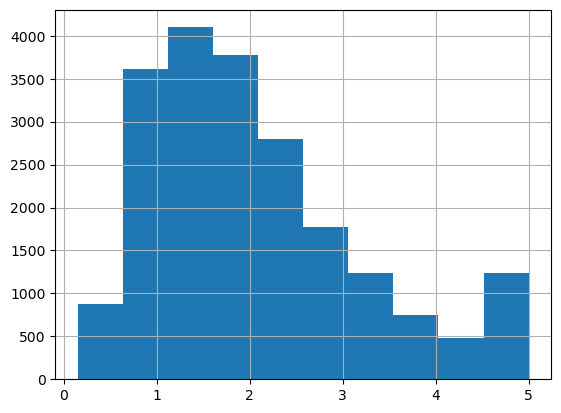

In [8]:
df['target'].hist()         # Histogram of the target variable

<AxesSubplot:>

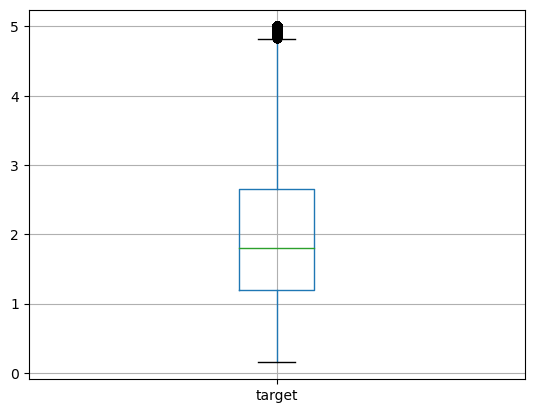

In [9]:
df.boxplot(column='target') # Box plot of the target variable

<AxesSubplot:>

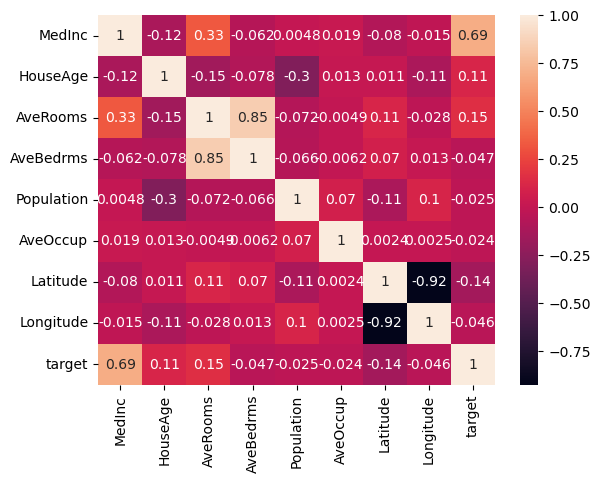

In [10]:
sns.heatmap(df.corr(), annot=True)  # Correlation matrix heatmap

### Data preperation and cleaning

In [11]:
missing_values = df.isnull().sum()
print(missing_values)


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


### Train and test the dataset

In [12]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

# Verify the dimensions of the split datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (16512, 8) (16512,)
Test set shape: (4128, 8) (4128,)


The training set, X_train and y_train, consists of 16,512 samples with 8 input features and their corresponding target values. This will be used to train and optimize your machine learning models.

The test set, X_test and y_test, contains 4,128 samples with the same 8 input features and their corresponding target values. This set will be used to evaluate the performance of your trained models on unseen data.

### Models

#### Linear Regression:

Train a linear regression model using sklearn.linear_model.LinearRegression.
Evaluate the model using metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE).

#### Decision Tree Regression:

Train a decision tree regression model using sklearn.tree.DecisionTreeRegressor.
Evaluate the model using the same regression metrics mentioned above.

#### Random Forest Regression:

Train a random forest regression model using sklearn.ensemble.RandomForestRegressor.
Evaluate the model using the same regression metrics.

#### Gradient Boosting Regression:

Train a gradient boosting regression model using sklearn.ensemble.GradientBoostingRegressor.
Evaluate the model using the same regression metrics.

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Train the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print("Linear Regression Metrics:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


Linear Regression Metrics:
Mean Squared Error (MSE): 0.5558915986952442
Root Mean Squared Error (RMSE): 0.7455813830127763
Mean Absolute Error (MAE): 0.5332001304956556


In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Train the Decision Tree Regression model
decision_tree_reg = DecisionTreeRegressor(random_state=42)
decision_tree_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print("Decision Tree Regression Metrics:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


Decision Tree Regression Metrics:
Mean Squared Error (MSE): 0.495235205629094
Root Mean Squared Error (RMSE): 0.7037294974840077
Mean Absolute Error (MAE): 0.45467918846899225


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Train the Random Forest Regression model
random_forest_reg = RandomForestRegressor(random_state=42)
random_forest_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print("Random Forest Regression Metrics:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


Random Forest Regression Metrics:
Mean Squared Error (MSE): 0.2553684927247781
Root Mean Squared Error (RMSE): 0.5053399773665033
Mean Absolute Error (MAE): 0.32754256845930246


In [16]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Train the Gradient Boosting Regression model
gradient_boosting_reg = GradientBoostingRegressor(random_state=42)
gradient_boosting_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gradient_boosting_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print("Gradient Boosting Regression Metrics:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


Gradient Boosting Regression Metrics:
Mean Squared Error (MSE): 0.2939973248643864
Root Mean Squared Error (RMSE): 0.5422152016168362
Mean Absolute Error (MAE): 0.3716425690425596


### Conclusion and Further analysis

Based on the updated metrics, we can make the following observations:

Among the evaluated models, the Random Forest Regression model achieves the lowest MSE, RMSE, and MAE values, indicating the best overall predictive performance. It outperforms both the Decision Tree Regression and Gradient Boosting Regression models in terms of all metrics.

The Gradient Boosting Regression model consistently performs better than the Decision Tree Regression model, as it achieves lower MSE, RMSE, and MAE values.

The Linear Regression model has the highest MSE, RMSE, and MAE values among the evaluated models, indicating the lowest predictive performance compared to the other models.

Based on these metrics, the Random Forest Regression model appears to be the top-performing model among the evaluated models for the California Housing dataset, followed by the Gradient Boosting Regression model.

#### Feature Importance: 

Random Forest models provide a feature importance score, which indicates the relative importance of each feature in the prediction process. You can analyze the feature importance to gain insights into which variables have the most significant impact on the sale price. This information can be valuable for decision-making and feature selection.

#### Predictions and Evaluation: 

Evaluate the model's performance on the test set using various evaluation metrics, such as MSE, RMSE, and MAE, to assess its accuracy and generalization ability.

#### Residual Analysis: 

Analyzing the residuals (the differences between the predicted and actual sale prices) can provide insights into the model's errors. Plotting the residuals can help identify any patterns or systematic errors that the model might be making, which can guide further improvements.

#### Model Interpretation: 

Random Forest models, although considered as black-box models, can still provide some level of interpretability. You can explore techniques like partial dependence plots, permutation importance, or SHAP (SHapley Additive exPlanations) values to gain insights into how the different features affect the predicted sale price.

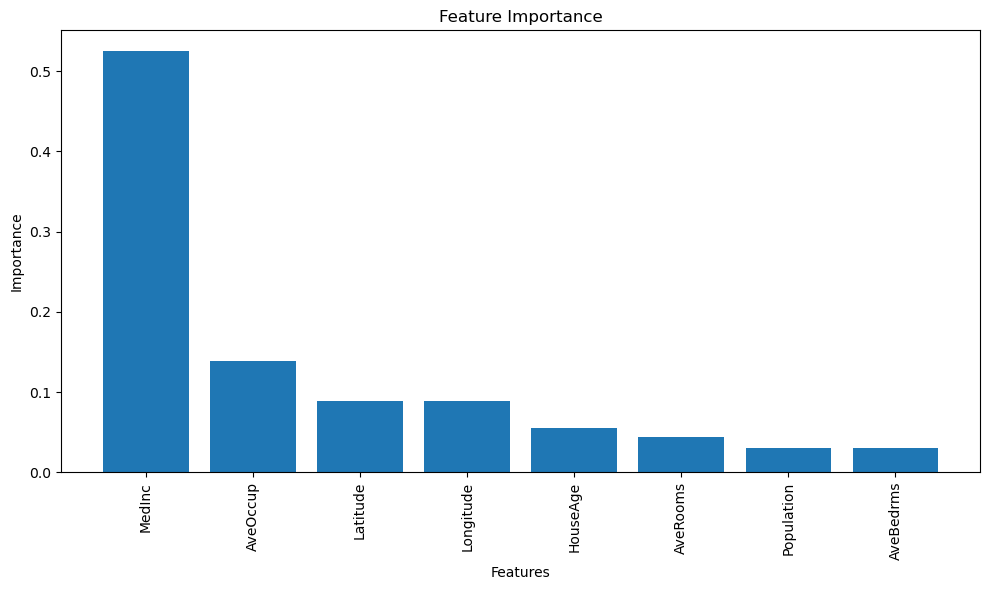

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Train the Random Forest Regression model
random_forest_reg.fit(X_train, y_train)

# Get feature importances
importances = random_forest_reg.feature_importances_

# Get feature names
feature_names = df.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names based on feature importances
sorted_feature_names = [feature_names[i] for i in indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), sorted_feature_names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()



In [18]:
# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': feature_names[:len(importances)], 'Importance': importances})

# Sort DataFrame by importance scores in descending order
importance_df = importance_df.sort_values('Importance', ascending=False)

# Display the importance values
print(importance_df)


      Feature  Importance
0      MedInc    0.524871
5    AveOccup    0.138443
6    Latitude    0.088936
7   Longitude    0.088629
1    HouseAge    0.054593
2    AveRooms    0.044272
4  Population    0.030650
3   AveBedrms    0.029606


In [19]:
# Make predictions on the test set
y_pred = random_forest_reg.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Calculate accuracy metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Print the accuracy metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): 0.2553684927247781
Root Mean Squared Error (RMSE): 0.5053399773665033
Mean Absolute Error (MAE): 0.32754256845930246


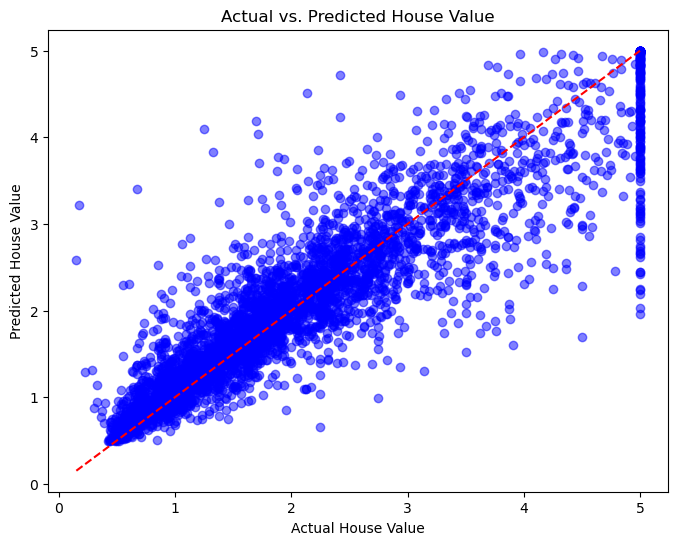

In [20]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual House Value')
plt.ylabel('Predicted House Value')
plt.title('Actual vs. Predicted House Value')
plt.show()


In [21]:
import pandas as pd

# Calculate residuals
residuals = y_test - y_pred

# Create a dataframe with actual, predicted, and residuals
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Residual': residuals})

# Print the dataframe
print(results_df)


        Actual  Predicted  Residual
20046  0.47700   0.509500 -0.032500
3024   0.45800   0.741610 -0.283610
15663  5.00001   4.923257  0.076753
20484  2.18600   2.529610 -0.343610
9814   2.78000   2.273690  0.506310
...        ...        ...       ...
15362  2.63300   2.267210  0.365790
16623  2.66800   1.993650  0.674350
18086  5.00001   4.758219  0.241791
2144   0.72300   0.714090  0.008910
3665   1.51500   1.650830 -0.135830

[4128 rows x 3 columns]


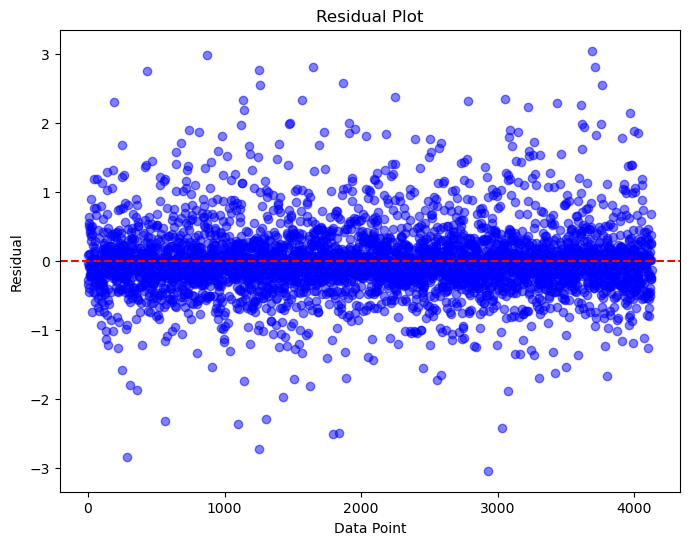

In [22]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(range(len(residuals)), residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Data Point')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()


In [23]:
mean_residual = results_df['Residual'].mean()
print("Mean Residual:", mean_residual)


Mean Residual: -0.012422473740309683


The mean of the residual values in your dataset is approximately -0.0124. This value indicates the average difference between the actual values and the predicted values. Since the mean residual is close to zero, it suggests that, on average, the model is making fairly accurate predictions. However, it's important to consider the specific context and requirements of your problem domain to determine whether this level of accuracy is sufficient for your needs.